## Importing Libraries

In [18]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Dataset

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
image = x_train[9]

In [6]:
y_train[9]

array([3], dtype=uint8)

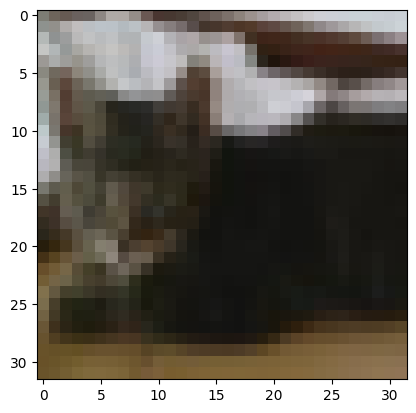

In [7]:
plt.imshow(image)

In [8]:
y_train.shape

(50000, 1)

## Preprocessing of Dataset

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_cat_train = to_categorical(y_train,10)

In [12]:
y_cat_test = to_categorical(y_test,10)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
scaled_image = x_train[9]

In [15]:
scaled_image.min(),scaled_image.max(),

(0.043137254901960784, 0.8549019607843137)

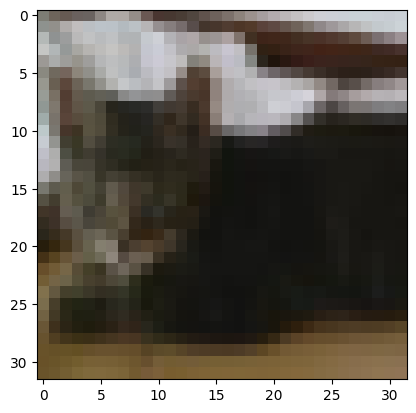

In [16]:
plt.imshow(scaled_image)

## Model Building

In [19]:
model = Sequential()

model.add(Conv2D(filters = 128 , kernel_size = (3,3) , input_shape = (32,32,3) , activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

In [20]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

## Model Training

In [22]:
model.fit(x_train , y_cat_train , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.5224 - accuracy: 0.4467
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5877
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0046 - accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9139 - accuracy: 0.6799
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8456 - accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7963 - accuracy: 0.7195
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7496 - accuracy: 0.7338
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7119 - accuracy: 0.7520
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6776 - accuracy: 0.7600
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.65

In [24]:
model.metrics_names

['loss', 'accuracy']

## Model Evaluation

In [25]:
model.evaluate(x_test , y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8570 - accuracy: 0.7126


[0.8570203185081482, 0.7125999927520752]

In [26]:
predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions , axis=1)

313/313 [==============================] - 1s 3ms/step


In [27]:
report = classification_report(y_test , prediction_classes)

In [28]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1000
           1       0.87      0.85      0.86      1000
           2       0.71      0.49      0.58      1000
           3       0.47      0.62      0.54      1000
           4       0.66      0.64      0.65      1000
           5       0.61      0.62      0.62      1000
           6       0.71      0.85      0.78      1000
           7       0.83      0.70      0.76      1000
           8       0.76      0.85      0.80      1000
           9       0.80      0.81      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



## Results with different parameters

basic model (1 conv layer + 1 maxpool) <br>
optimizer = rmsprop<br>
epochs = 2<br>
training-accuracy = 67<br>

basic model (1 conv layer + 1 maxpool) <br>
optimizer = adam<br>
epochs = 20<br>
training-accuracy = 97<br>
test-accuracy = 63<br>

added model (2 conv layers + 1 maxpool)<br>
optimizer = adam<br>
epochs = 10<br>
training-accuracy = 83<br>
test-accuracy = 72<br>

added model (2 conv layers + 1 maxpool)<br>
optimizer = rmsprop<br>
epochs = 10<br>
training-accuracy = 92<br>
test-accuracy = 69<br>

model add (2 conv layers + 1 maxpool + 1 Dense)<br>
optimizer = adam<br>
epochs = 20<br>
training-accuracy = 85<br>
test-accuracy = 70<br>

model add (2 conv layers + 1 maxpool)<br>
optimizer = adam<br>
epochs = 20<br>
training-accuracy = 91<br>
test-accuracy = 69<br>